# Top Words in Positive and Negative Bank of England Speeches

This analysis focuses on speeches delivered by the Bank of England, identifying the top five most frequently used words from each of the top 15 most positive and top 15 most negative speeches.  

### **Time Frame: 01-Jan-2020 to 31-Oct-2022**

# 1. Import the necessary libraries and load the data source

In [2]:
# Import necessary libraries for data handling, visualization, and text processing 
import pandas as pd                     # For data manipulation and analysis
import matplotlib.pyplot as plt         # For creating static plots
import seaborn as sns                   # For enhanced data visualizations
from wordcloud import WordCloud         # For generating word clouds from text data
from collections import Counter         # For counting word frequencies
from sklearn.feature_extraction.text import CountVectorizer  # For converting text to a matrix of token counts

# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\emily\\Documents\\GitHub\\group-project\\group-project\\df_uk_for_top_speeches.csv")

# Display the first few rows of the dataset to preview the data
df.head()


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,SentimentScore_nltk,...,Year_Chunk,polarity_textblob,subjectivity_textblob,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,Sentiment_vader,lexicon_score,roberta_sentiment
0,r980915a_BOE,United Kingdom,15-09-98,1998.0,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,-54.9,...,1995–1999,0.064536841,0.427930,0.737529,0.099846,0.162625,-0.062779,-0.9927,-54.9,Neutral
1,r981021b_BOE,United Kingdom,21-10-98,1998.0,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,-51.8,...,1995–1999,0.06279094,0.356223,0.532217,0.466339,0.001444,0.464896,0.9995,-51.8,Neutral
2,r981021a_BOE,United Kingdom,21-10-98,1998.0,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,-97.6,...,1995–1999,0.067740919,0.380480,0.808452,0.022303,0.169245,-0.146942,-0.9906,-97.6,Negative
3,r981101a_BOE,United Kingdom,01-11-98,1998.0,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policymak...,-153.8,...,1995–1999,0.055704712,0.465611,0.983587,0.015397,0.001015,0.014382,-0.9952,-153.8,Neutral
4,r981101b_BOE,United Kingdom,01-11-98,1998.0,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,-219.8,...,1995–1999,0.048788618,0.387690,0.983661,0.015350,0.000989,0.014361,-0.9993,-219.8,Neutral


# 2. **Process Data, Format It, and Apply Data Frame Filter**

In [3]:
import warnings
warnings.filterwarnings("ignore", message="Could not infer format*")

# Convert the 'Date' column to datetime, assuming day-month-year format (handles mixed styles like 01/02/2022 and 01-Feb-2022)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Remove rows with invalid or missing dates
df = df.dropna(subset=['Date'])

# Filter the DataFrame for a specific time period
start_date = "2020-01-01"  # Start of the time period (YYYY-MM-DD)
end_date = "2022-10-31"    # End of the time period (YYYY-MM-DD)

# Convert the start and end dates to datetime for comparison
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter rows within the date range
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Standardize the date format to '01-Jan-2022' as string
df['Date'] = df['Date'].dt.strftime('%d-%b-%Y')

# Display the first few formatted dates
print(df['Date'].head())

import datetime

# Example start_date and end_date
start_date = "2020-01-01"
end_date = "2022-10-31"

# Convert to datetime objects
start_date_obj = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_date_obj = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Format as "Month Year" (e.g., "January 2022")
start_date_formatted = start_date_obj.strftime("%B %Y")
end_date_formatted = end_date_obj.strftime("%B %Y")

# Example usage in title
print(f"From {start_date_formatted} to {end_date_formatted}")

1108    13-Oct-2020
1109    12-Oct-2020
1110    06-Oct-2020
1111    30-Sep-2020
1112    22-Sep-2020
Name: Date, dtype: object
From January 2020 to October 2022


# 3. Clean the 'polarity_textblob' column by converting it to numeric, removing invalid values, and selecting the top 15 highest scores.

In [4]:
# Convert 'polarity_textblob' column to numeric values (coerce invalid entries to NaN),
# then remove rows with NaN in that column,
# and finally select the top 10 rows with the highest polarity scores.
df['polarity_textblob'] = pd.to_numeric(df['polarity_textblob'], errors='coerce')  # convert to numeric, invalid to NaN
df = df.dropna(subset=['polarity_textblob'])  # remove rows where conversion failed (optional)
top_rows = df.nlargest(15, 'polarity_textblob')  # now this works


# 4. Top 5 Positive/Negative Speeches

In [5]:
# ========================
# 1. Top 5 positive/negative speeches
# ========================
top5_pos = df.nlargest(15, 'polarity_textblob')[['Title', 'Author', 'polarity_textblob']]
top5_neg = df.nsmallest(15, 'polarity_textblob')[['Title', 'Author', 'polarity_textblob']]

print("Top 5 Positive Speeches:")
print(top5_pos)

print("\nTop 15 Negative Speeches:")
print(top5_neg)

Top 5 Positive Speeches:
                                                  Title     Author  \
1246                                 Banknote character     Bailey   
1295                                          New tides   Benjamin   
1169  A Bank of England perspective on gender divers...   Paterson   
1308  The PRA’s supervisory priorities for the insur...     Gerken   
1326  What will operational resilience look like goi...  Mackinnon   
1108                              Cross-border payments    Cleland   
1301                       A resilient financial system     Bailey   
1253                             Operational resilience     Nelson   
1230  Responsible openness: The PRA’s approach to su...     Bailey   
1143  The impact of leveraged investors on market li...   Cunliffe   
1258                              Meeting varied people     Bailey   
1152              The monetary policy toolbox in the UK    Ramsden   
1195                               Future world of work      Plac

## 5. Sentiment Distribution (FinBERT)


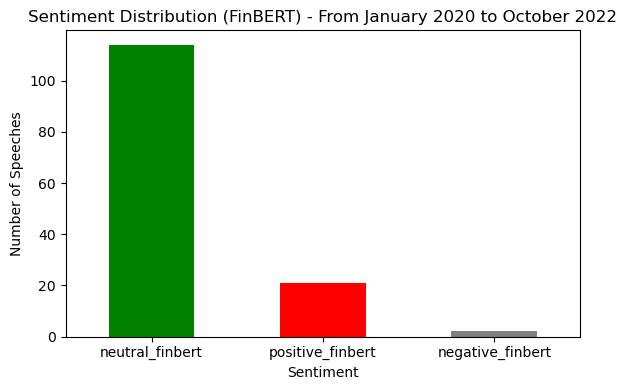

In [6]:
# ========================
# 2. Sentiment distribution (FinBERT)
# ========================
df['DominantSentiment'] = df[['positive_finbert', 'negative_finbert', 'neutral_finbert']].idxmax(axis=1)
sentiment_counts = df['DominantSentiment'].value_counts()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
#plt.title("Sentiment Distribution (FinBERT)")
#plt.title(f"Sentiment Distribution (FinBERT) - Starting from {start_date}")
plt.title(f"Sentiment Distribution (FinBERT) - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Sentiment")
plt.ylabel("Number of Speeches")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

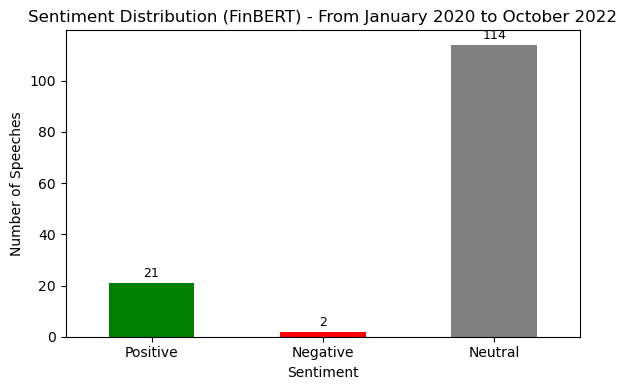

In [7]:
# ========================
# 2. Sentiment distribution (FinBERT)
# ========================

# Identify the dominant sentiment per speech
df['DominantSentiment'] = df[['positive_finbert', 'negative_finbert', 'neutral_finbert']].idxmax(axis=1)

# Count the number of speeches per sentiment
sentiment_counts = df['DominantSentiment'].value_counts().reindex(['positive_finbert', 'negative_finbert', 'neutral_finbert'])

# Plotting
plt.figure(figsize=(6, 4))
bars = sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Titles and labels
plt.title(f"Sentiment Distribution (FinBERT) - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Sentiment")
plt.ylabel("Number of Speeches")
plt.xticks(
    ticks=[0, 1, 2],
    labels=['Positive', 'Negative', 'Neutral'],
    rotation=0
)
plt.tight_layout()

# Annotate counts on top of bars
for idx, value in enumerate(sentiment_counts):
    plt.text(idx, value + 1, str(value), ha='center', va='bottom', fontsize=9)

plt.show()


# 6. Top 20 Most Used Words


C:\Users\emily\AppData\Local\Temp\ipykernel_22052\4208680766.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")


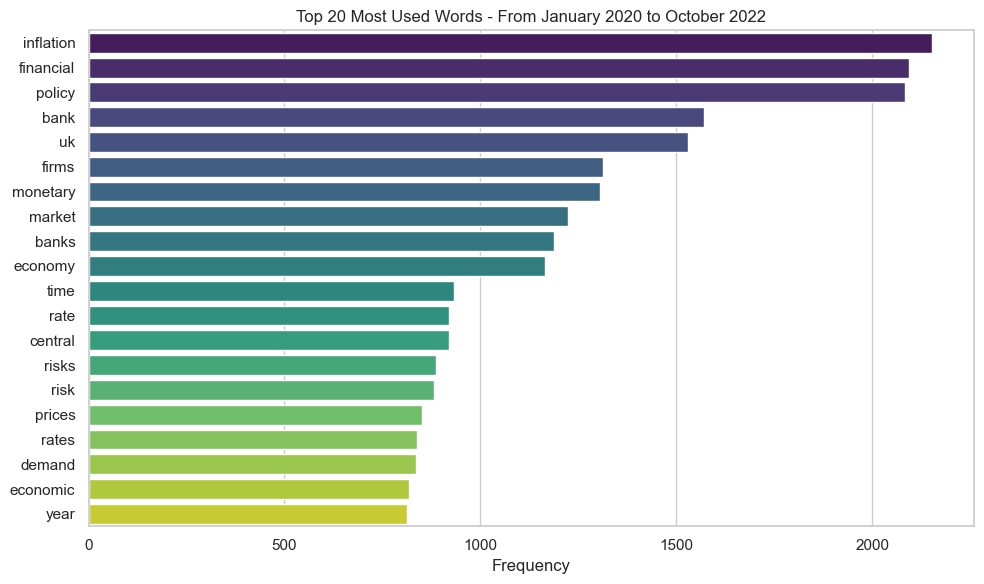

Top 20 Most Used Words:
inflation: 2152
financial: 2093
policy: 2084
bank: 1571
uk: 1530
firms: 1314
monetary: 1304
market: 1223
banks: 1188
economy: 1165
time: 933
rate: 921
central: 920
risks: 887
risk: 882
prices: 852
rates: 838
demand: 836
economic: 818
year: 813


In [25]:
# ========================
# 3. Top 20 Most Used Words
# ========================
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Text'].dropna())
word_counts = X.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()
word_freq = dict(zip(vocab, word_counts))
top_words = dict(Counter(word_freq).most_common(20))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
#plt.title("Top 20 Most Used Words - From {start_date} to {end_date}")
plt.title(f"Top 20 Most Used Words - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

print("Top 20 Most Used Words:")
for word, freq in top_words.items():
    print(f"{word}: {freq}")


# 7. Histogram of Polarity Scores

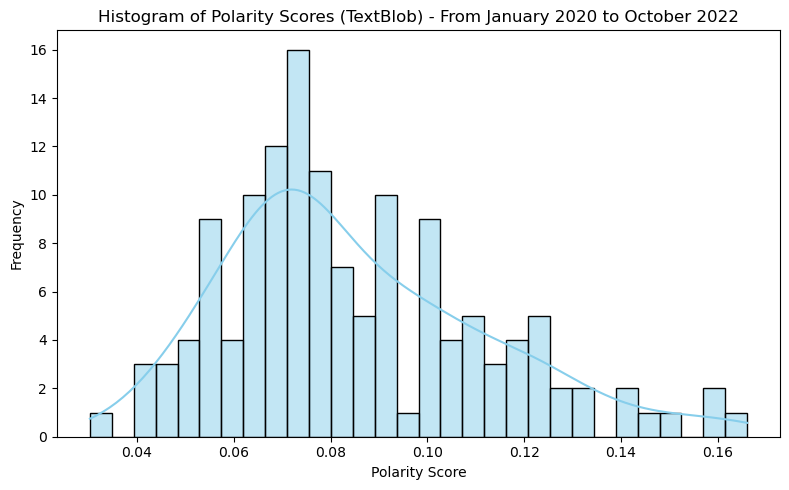

In [9]:
# ========================
# 4. Histogram of Polarity Scores
# ========================
plt.figure(figsize=(8, 5))
sns.histplot(df['polarity_textblob'].dropna(), bins=30, kde=True, color='skyblue')
#plt.title("Histogram of Polarity Scores (TextBlob)")
plt.title(f"Histogram of Polarity Scores (TextBlob) - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Histogram of Polarity Scores - The histogram shows that the majority of polarity scores fall within a mildly positive range, peaking around 0.06 to 0.08. This suggests that, overall, the analyzed texts from January 2020 to October 2022 tend to express slightly positive sentiment. Negative and highly positive sentiments are relatively uncommon, indicating a generally neutral to mildly optimistic tone throughout the dataset.

# 8. Top 5 Positive/Negative Words (from top speeches)


Top 5 Words in Most Positive Speeches:
firms: 225
business: 126
impact: 115
important: 110
services: 88

Top 5 Words in Most Negative Speeches:
policy: 140
rate: 132
inflation: 129
uk: 105
bank: 99


C:\Users\emily\AppData\Local\Temp\ipykernel_22052\2538373246.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words_pos.values()), y=list(top_words_pos.keys()), palette="Greens_r", ax=axes[0])
C:\Users\emily\AppData\Local\Temp\ipykernel_22052\2538373246.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words_neg.values()), y=list(top_words_neg.keys()), palette="Reds_r", ax=axes[1])


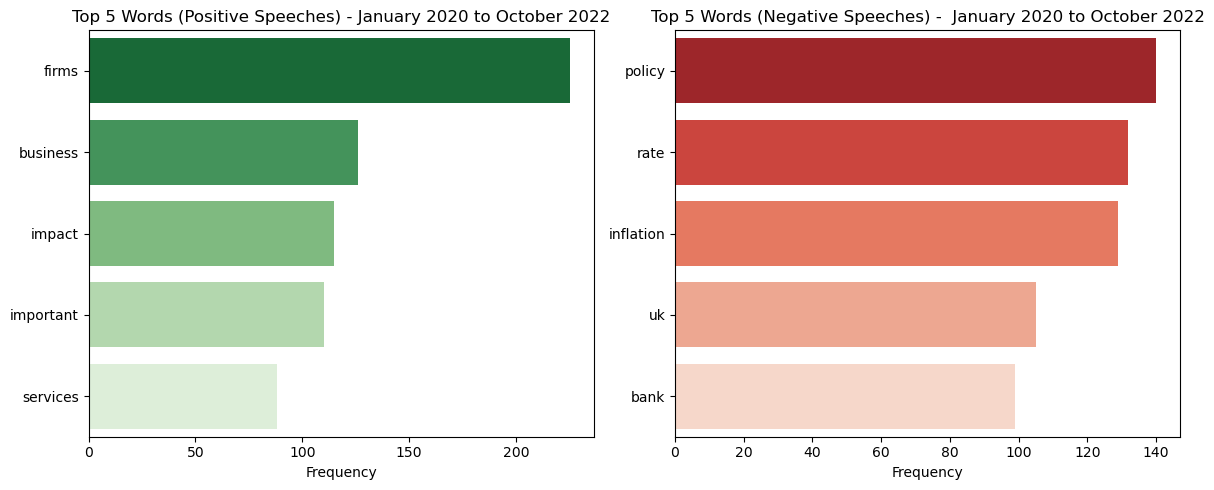

In [10]:
# ========================
# 1b. Top 5 Positive/Negative Words (from top speeches)
# ========================

# Ensure 'polarity_textblob' is numeric
df['polarity_textblob'] = pd.to_numeric(df['polarity_textblob'], errors='coerce')
df = df.dropna(subset=['polarity_textblob', 'Text'])  # Drop rows with missing polarity or text

# Use the top 5 positive/negative speeches
top5_texts_pos = df.nlargest(5, 'polarity_textblob')['Text']
top5_texts_neg = df.nsmallest(5, 'polarity_textblob')['Text']

# Vectorize separately for positive and negative speeches
vectorizer = CountVectorizer(stop_words='english')

# Positive
X_pos = vectorizer.fit_transform(top5_texts_pos)
word_counts_pos = X_pos.toarray().sum(axis=0)
vocab_pos = vectorizer.get_feature_names_out()
word_freq_pos = dict(zip(vocab_pos, word_counts_pos))
top_words_pos = dict(Counter(word_freq_pos).most_common(5))

# Negative
X_neg = vectorizer.fit_transform(top5_texts_neg)

# ========================
# 1b. Top 5 Positive/Negative Words (from top speeches)
# ========================

# Ensure 'polarity_textblob' is numeric
df['polarity_textblob'] = pd.to_numeric(df['polarity_textblob'], errors='coerce')
df = df.dropna(subset=['polarity_textblob', 'Text'])  # Drop rows with missing polarity or text

# Use the top 5 positive/negative speeches
top5_texts_pos = df.nlargest(5, 'polarity_textblob')['Text']
top5_texts_neg = df.nsmallest(5, 'polarity_textblob')['Text']

# Vectorize separately for positive and negative speeches
vectorizer = CountVectorizer(stop_words='english')

# Positive
X_pos = vectorizer.fit_transform(top5_texts_pos)
word_counts_pos = X_pos.toarray().sum(axis=0)
vocab_pos = vectorizer.get_feature_names_out()
word_freq_pos = dict(zip(vocab_pos, word_counts_pos))
top_words_pos = dict(Counter(word_freq_pos).most_common(5))

# Negative
X_neg = vectorizer.fit_transform(top5_texts_neg)
word_counts_neg = X_neg.toarray().sum(axis=0)
vocab_neg = vectorizer.get_feature_names_out()
word_freq_neg = dict(zip(vocab_neg, word_counts_neg))
top_words_neg = dict(Counter(word_freq_neg).most_common(5))

# Display
print("Top 5 Words in Most Positive Speeches:")
for word, count in top_words_pos.items():
    print(f"{word}: {count}")

print("\nTop 5 Words in Most Negative Speeches:")
for word, count in top_words_neg.items():
    print(f"{word}: {count}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=list(top_words_pos.values()), y=list(top_words_pos.keys()), palette="Greens_r", ax=axes[0])
#axes[0].set_title("Top 5 Words (Positive Speeches)")
#axes[0].set_title(f"Top 5 Words (Positive Speeches) - From {start_date_formatted} to {end_date_formatted}")
axes[0].set_title(f"Top 5 Words (Positive Speeches) - {start_date_formatted} to {end_date_formatted}")
axes[0].set_xlabel("Frequency")

sns.barplot(x=list(top_words_neg.values()), y=list(top_words_neg.keys()), palette="Reds_r", ax=axes[1])
#axes[1].set_title("Top 5 Words (Negative Speeches)")
#axes[1].set_title(f"Top 5 Words (Negative Speeches) - From {start_date_formatted} to {end_date_formatted}")
axes[1].set_title(f"Top 5 Words (Negative Speeches) -  {start_date_formatted} to {end_date_formatted}")
axes[1].set_xlabel("Frequency")

plt.tight_layout()
plt.show()


C:\Users\emily\AppData\Local\Temp\ipykernel_22052\4247787762.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words_pos.values()), y=list(top_words_pos.keys()), palette="Greens_r", ax=axes[0, 0])
C:\Users\emily\AppData\Local\Temp\ipykernel_22052\4247787762.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words_neg.values()), y=list(top_words_neg.keys()), palette="Reds_r", ax=axes[1, 0])


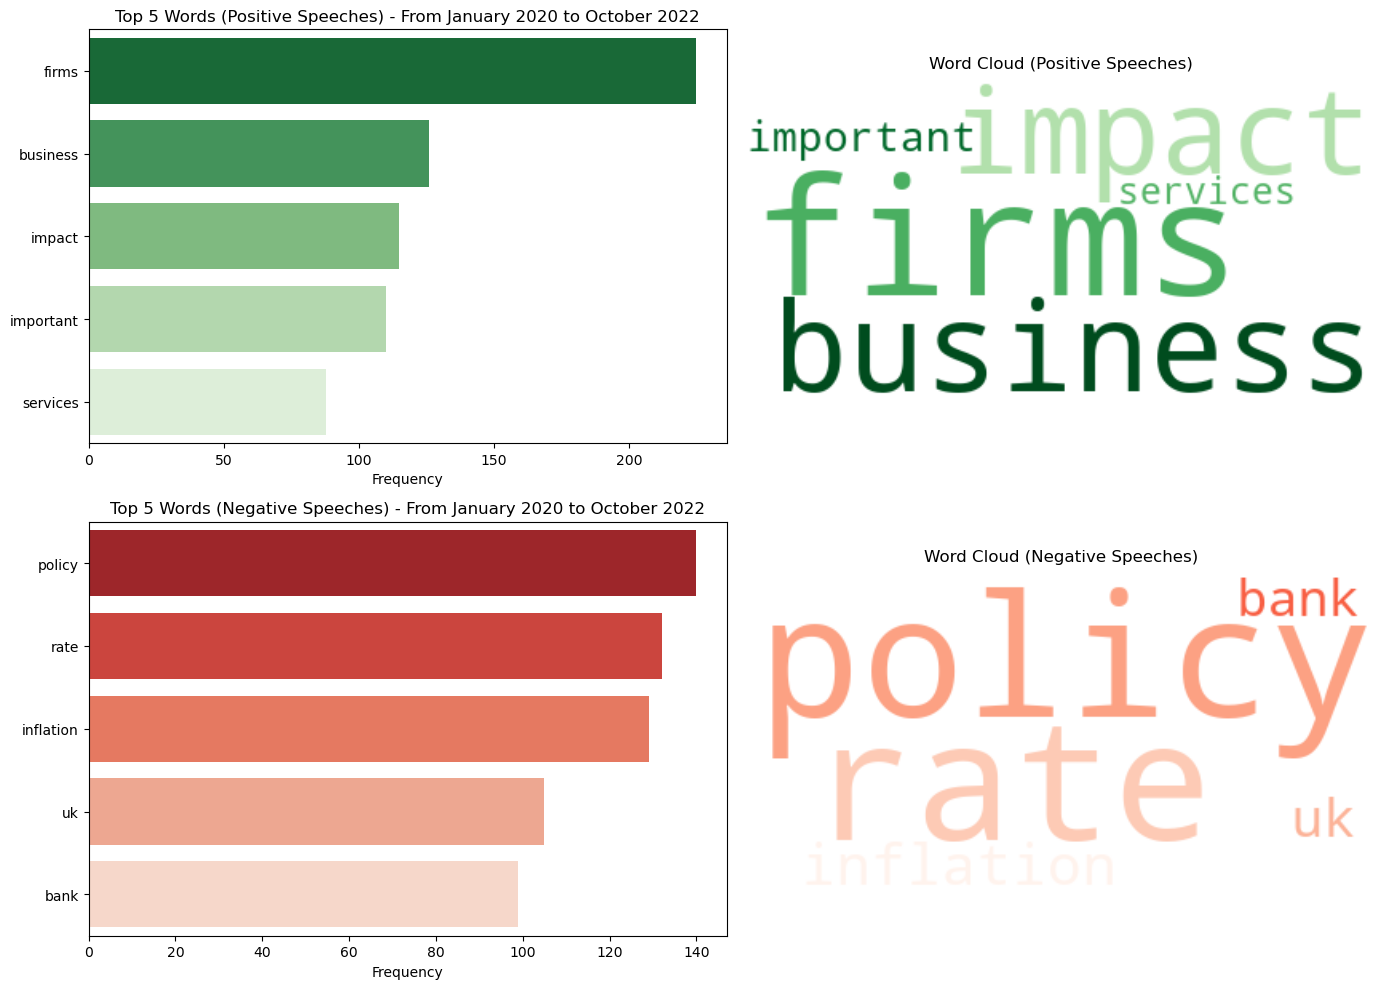

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# (Your existing code here)

# ========================
# After you have top_words_pos and top_words_neg dictionaries
# ========================

# Generate word clouds
wordcloud_pos = WordCloud(width=400, height=200, background_color='white', colormap='Greens').generate_from_frequencies(top_words_pos)
wordcloud_neg = WordCloud(width=400, height=200, background_color='white', colormap='Reds').generate_from_frequencies(top_words_neg)

# Plot barplots and word clouds side by side
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Barplot Positive
sns.barplot(x=list(top_words_pos.values()), y=list(top_words_pos.keys()), palette="Greens_r", ax=axes[0, 0])
#axes[0, 0].set_title("Top 5 Words (Positive Speeches)")
axes[0,0].set_title(f"Top 5 Words (Positive Speeches) - From {start_date_formatted} to {end_date_formatted}")
axes[0, 0].set_xlabel("Frequency")

# Wordcloud Positive
axes[0, 1].imshow(wordcloud_pos, interpolation='bilinear')
axes[0, 1].axis('off')
axes[0, 1].set_title("Word Cloud (Positive Speeches)")

# Barplot Negative
sns.barplot(x=list(top_words_neg.values()), y=list(top_words_neg.keys()), palette="Reds_r", ax=axes[1, 0])
#axes[1, 0].set_title("Top 5 Words (Negative Speeches)")
axes[1,0].set_title(f"Top 5 Words (Negative Speeches) - From {start_date_formatted} to {end_date_formatted}")
axes[1, 0].set_xlabel("Frequency")

# Wordcloud Negative
axes[1, 1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1, 1].axis('off')
axes[1, 1].set_title("Word Cloud (Negative Speeches)")

plt.tight_layout()
plt.show()


# 9. Top 10 Words Over the Period

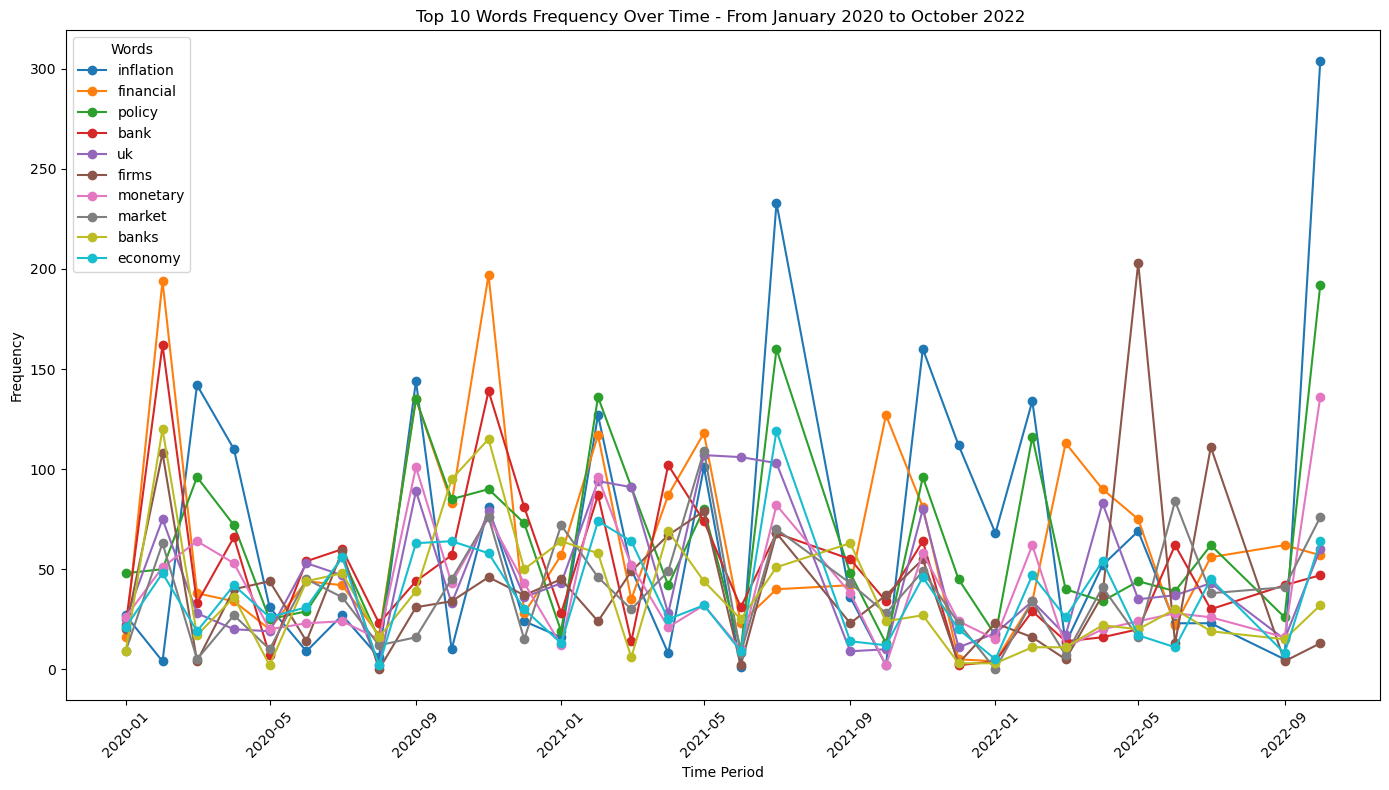

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
N = 10  # Top N words to track
time_col = 'Date'  # Your date/time column
df[time_col] = pd.to_datetime(df[time_col])  # Ensure datetime

# Define time grouping - here monthly, can change to 'W' (weekly), 'D' (daily) etc.
df['time_period'] = df[time_col].dt.to_period('M').dt.to_timestamp()

# Group texts by time period
grouped = df.groupby('time_period')['Text'].apply(lambda texts: ' '.join(texts))

# Vectorize grouped texts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(grouped)

# Get vocabulary and sum frequencies across all time periods to find top words
total_word_counts = X.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()

# Select top N words overall
top_n_indices = total_word_counts.argsort()[::-1][:N]
top_n_words = [vocab[i] for i in top_n_indices]

# Create a DataFrame with time periods as rows and top words frequencies as columns
freq_df = pd.DataFrame(X.toarray(), index=grouped.index, columns=vocab)
freq_top_n = freq_df[top_n_words]

# Plotting the trends over time for top N words
plt.figure(figsize=(14, 8))
for word in top_n_words:
    plt.plot(freq_top_n.index, freq_top_n[word], marker='o', label=word)

plt.title(f"Top {N} Words Frequency Over Time - From {start_date_formatted} to {end_date_formatted} ")
plt.xlabel("Time Period")
plt.ylabel("Frequency")
plt.legend(title="Words")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 10. Analyze a Dip & Peak Timestamp and Its Surrounding Events in Top Positive Speeches

In [13]:
# Group by monthly periods and count speeches
df['time_period'] = df['Date'].dt.to_period('M').dt.to_timestamp()
speech_counts = df.groupby('time_period').size()

# Find the timestamp with the dip
dip_timestamp = speech_counts.idxmin()
dip_value = speech_counts.min()

print(f"Dip occurred at: {dip_timestamp}, with a value of {dip_value}")

Dip occurred at: 2020-08-01 00:00:00, with a value of 1


In [14]:
# Filter data for one period before and after the dip
dip_period_data = df[(df['time_period'] >= dip_timestamp - pd.DateOffset(months=1)) &
                     (df['time_period'] <= dip_timestamp + pd.DateOffset(months=1))]

# Analyze the data around the dip
print(dip_period_data[['Date', 'Author', 'Text', 'IsGov']])

           Date     Author                                               Text  \
1111 2020-09-30    Haldane  views expressed not necessarily bank england m...   
1112 2020-09-22    Sweeney  chancellor exchequer response recommendations ...   
1113 2020-09-04   Saunders  speech want look back economic developments ye...   
1129 2020-09-02  Broadbent  good afternoon thank asking speak today import...   
1130 2020-09-21     Hauser  andrew hauser explains companies need act tran...   
1151 2020-08-28     Bailey  great pleasure participating virtual jackson h...   
1153 2020-07-23     Haskel  good afternoon everyone thank today around wor...   
1158 2020-07-22    Breeden  sarah breeden discusses proposed new guide ban...   
1178 2020-07-15   Tenreyro  great speak lse morning along universities res...   
1180 2020-07-13     Bailey  passing summer thought summer land without cri...   
1181 2020-07-01     Haskel  thank hosting today particular plus accounting...   

     IsGov  
1111    No  
1

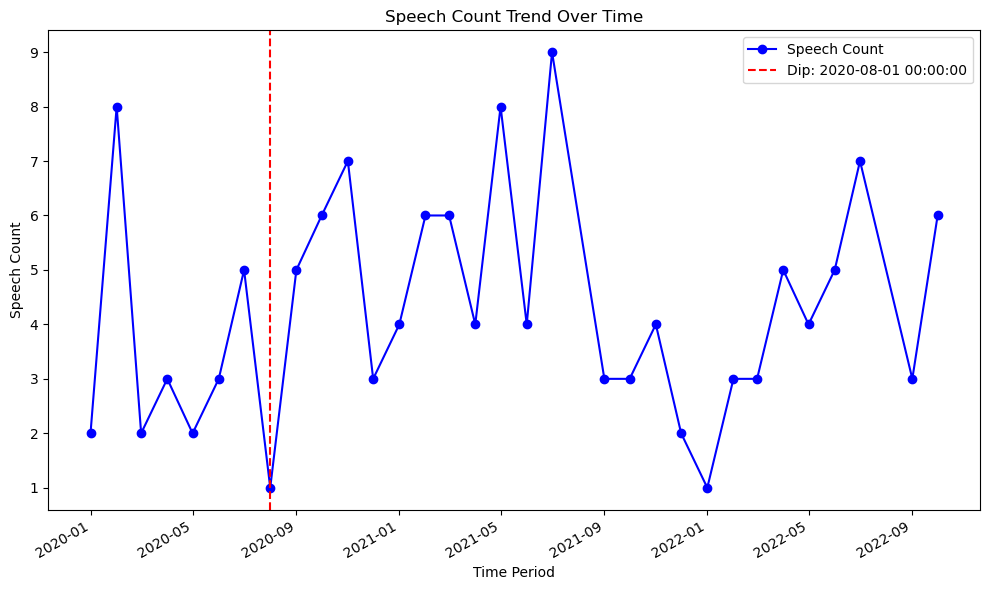

In [15]:
import matplotlib.pyplot as plt

# Plot speech counts over time
plt.figure(figsize=(10, 6))
speech_counts.plot(kind='line', marker='o', color='blue', label='Speech Count')

# Highlight the dip
plt.axvline(x=dip_timestamp, color='red', linestyle='--', label=f'Dip: {dip_timestamp}')

# Add labels and title
plt.title('Speech Count Trend Over Time')
plt.xlabel('Time Period')
plt.ylabel('Speech Count')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# Group by time period (e.g., monthly) and count the number of speeches
speech_counts = df.groupby('time_period').size()

# Find the timestamp with the peak
peak_timestamp = speech_counts.idxmax()
peak_value = speech_counts.max()

print(f"Peak occurred at: {peak_timestamp}, with a value of {peak_value}")

# Filter data for the peak period
peak_period_data = df[df['time_period'] == peak_timestamp]

# Analyze the data for the peak period
print("Details of speeches during the peak period:")
print(peak_period_data[['Date', 'Author', 'Text', 'IsGov']])

Peak occurred at: 2021-07-01 00:00:00, with a value of 9
Details of speeches during the peak period:
           Date     Author                                               Text  \
1191 2021-07-19     Haskel  would also like thank andrew bailey lukas von ...   
1192 2021-07-01     Bailey  andrew bailey says covid not impact economy sh...   
1193 2021-07-15   Saunders  speech want discuss recent developments econom...   
1194 2021-07-14    Ramsden  good back speaking 51 strand group event role ...   
1195 2021-07-05      Place  jo place explains changing way work bank engla...   
1202 2021-07-21    Saporta  good morning ladies gentlemen pleasure able sp...   
1205 2021-07-22  Broadbent  bank england mpc something many graphs also lo...   
1207 2021-07-28      Churm  disclosures room enhancement light guidance se...   
1223 2021-07-26    No_Info  good afternoon todays public lecture last exte...   

     IsGov  
1191    No  
1192    No  
1193    No  
1194    No  
1195    No  
1202    No

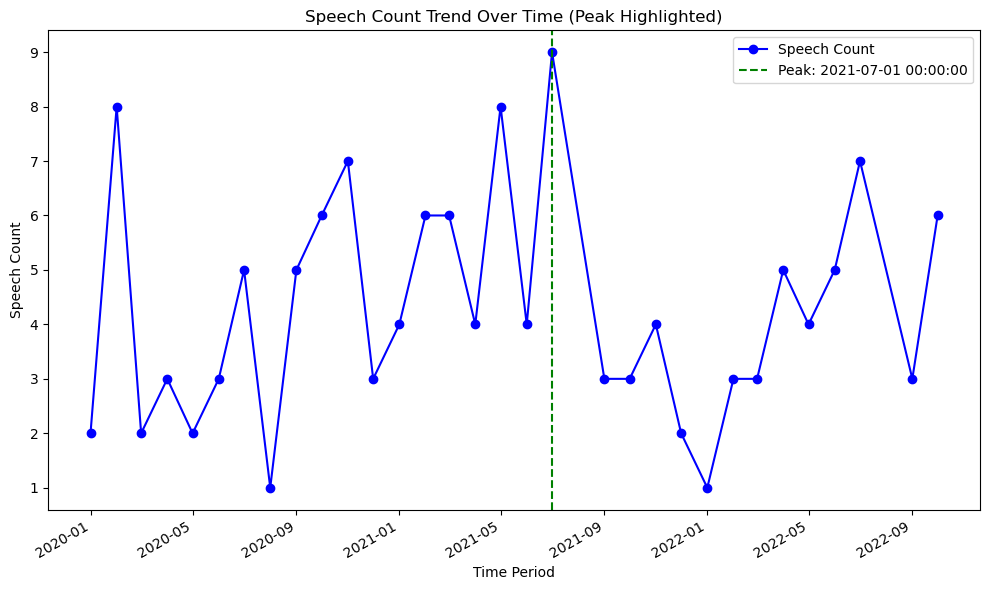

In [17]:
import matplotlib.pyplot as plt

# Plot the speech count trend
plt.figure(figsize=(10, 6))
speech_counts.plot(kind='line', marker='o', color='blue', label='Speech Count')

# Highlight the peak
plt.axvline(x=peak_timestamp, color='green', linestyle='--', label=f'Peak: {peak_timestamp}')

# Add titles and labels
plt.title('Speech Count Trend Over Time (Peak Highlighted)')
plt.xlabel('Time Period')
plt.ylabel('Speech Count')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert Date column to datetime and create a time_period column
df['Date'] = pd.to_datetime(df['Date'])
df['time_period'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Filter for positive speeches only (e.g., where positive_finbert > 0.5)
positive_speeches = df[df['positive_finbert'] > 0.1]

# Group by time period and count positive speeches
positive_counts = positive_speeches.groupby('time_period').size()

# Find the peak and dip timestamps
peak_timestamp = positive_counts.idxmax()
peak_value = positive_counts.max()
dip_timestamp = positive_counts.idxmin()
dip_value = positive_counts.min()

print(f"Peak of positive speeches: {peak_timestamp} with {peak_value} speeches")
print(f"Dip of positive speeches: {dip_timestamp} with {dip_value} speeches")

# Filter data for the peak period
peak_period_data = positive_speeches[positive_speeches['time_period'] == peak_timestamp]

# Filter data for the dip period
dip_period_data = positive_speeches[positive_speeches['time_period'] == dip_timestamp]

# Display details
print("\nDetails of speeches during the peak period:")
print(peak_period_data[['Date', 'Author', 'Text', 'IsGov']])

print("\nDetails of speeches during the dip period:")
print(dip_period_data[['Date', 'Author', 'Text', 'IsGov']])

Peak of positive speeches: 2021-07-01 00:00:00 with 5 speeches
Dip of positive speeches: 2020-05-01 00:00:00 with 1 speeches

Details of speeches during the peak period:
           Date    Author                                               Text  \
1191 2021-07-19    Haskel  would also like thank andrew bailey lukas von ...   
1192 2021-07-01    Bailey  andrew bailey says covid not impact economy sh...   
1193 2021-07-15  Saunders  speech want discuss recent developments econom...   
1195 2021-07-05     Place  jo place explains changing way work bank engla...   
1202 2021-07-21   Saporta  good morning ladies gentlemen pleasure able sp...   

     IsGov  
1191    No  
1192    No  
1193    No  
1195    No  
1202    No  

Details of speeches during the dip period:
           Date  Author                                               Text  \
1187 2020-05-22  Gerken  charlotte gerken looks insurance industry resp...   

     IsGov  
1187    No  


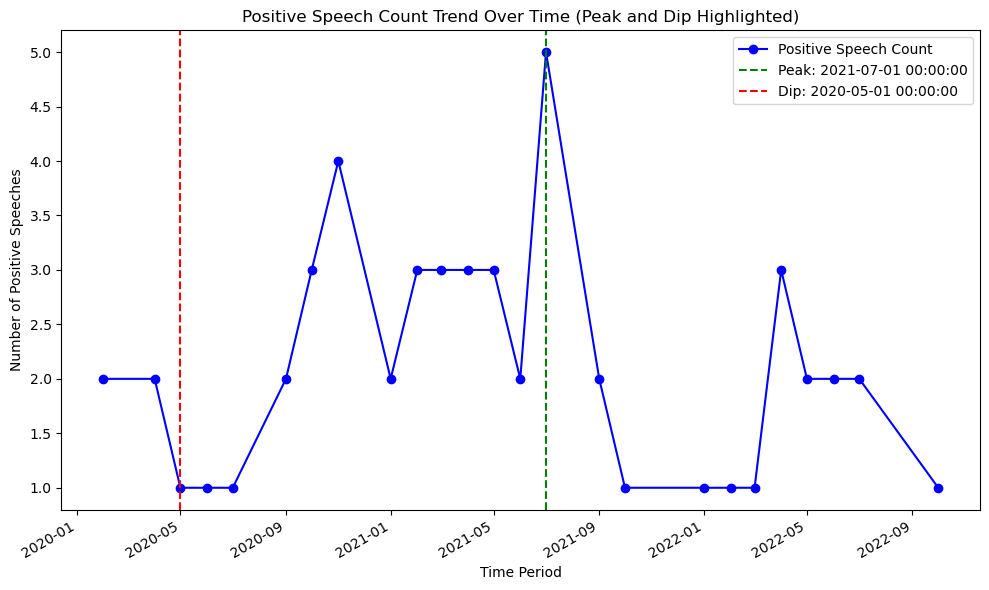

In [19]:
# Plot positive speech counts over time
plt.figure(figsize=(10, 6))
positive_counts.plot(kind='line', marker='o', color='blue', label='Positive Speech Count')

# Highlight the peak and dip
plt.axvline(x=peak_timestamp, color='green', linestyle='--', label=f'Peak: {peak_timestamp}')
plt.axvline(x=dip_timestamp, color='red', linestyle='--', label=f'Dip: {dip_timestamp}')

# Add titles and labels
plt.title('Positive Speech Count Trend Over Time (Peak and Dip Highlighted)')
plt.xlabel('Time Period')
plt.ylabel('Number of Positive Speeches')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert Date column to datetime and create a time_period column
df['Date'] = pd.to_datetime(df['Date'])
df['time_period'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Filter for negative speeches only (e.g., where negative_finbert > 0.5)
negative_speeches = df[df['negative_finbert'] > 0.01]

# Group by time period and count negative speeches
negative_counts = negative_speeches.groupby('time_period').size()

# Find the peak and dip timestamps
peak_timestamp = negative_counts.idxmax()
peak_value = negative_counts.max()
dip_timestamp = negative_counts.idxmin()
dip_value = negative_counts.min()

print(f"Peak of negative speeches: {peak_timestamp} with {peak_value} speeches")
print(f"Dip of negative speeches: {dip_timestamp} with {dip_value} speeches")

# Filter data for the peak period
peak_period_data = negative_speeches[negative_speeches['time_period'] == peak_timestamp]

# Filter data for the dip period
dip_period_data = negative_speeches[negative_speeches['time_period'] == dip_timestamp]

# Display details
print("\nDetails of speeches during the peak period:")
print(peak_period_data[['Date', 'Author', 'Text', 'IsGov']])

print("\nDetails of speeches during the dip period:")
print(dip_period_data[['Date', 'Author', 'Text', 'IsGov']])

Peak of negative speeches: 2022-05-01 00:00:00 with 4 speeches
Dip of negative speeches: 2020-01-01 00:00:00 with 1 speeches

Details of speeches during the peak period:
           Date     Author                                               Text  \
1317 2022-05-03   Stheeman  elisabeth stheeman notes climate change transi...   
1318 2022-05-09   Saunders  let give main points upfront gdp growth q1 yea...   
1325 2022-05-23     Bailey  time large economic shocks particularly large ...   
1326 2022-05-25  Mackinnon  important business services impact tolerances ...   

     IsGov  
1317    No  
1318    No  
1325    No  
1326    No  

Details of speeches during the dip period:
           Date    Author                                               Text  \
1164 2020-01-15  Saunders  views expressed not necessarily bank england m...   

     IsGov  
1164    No  


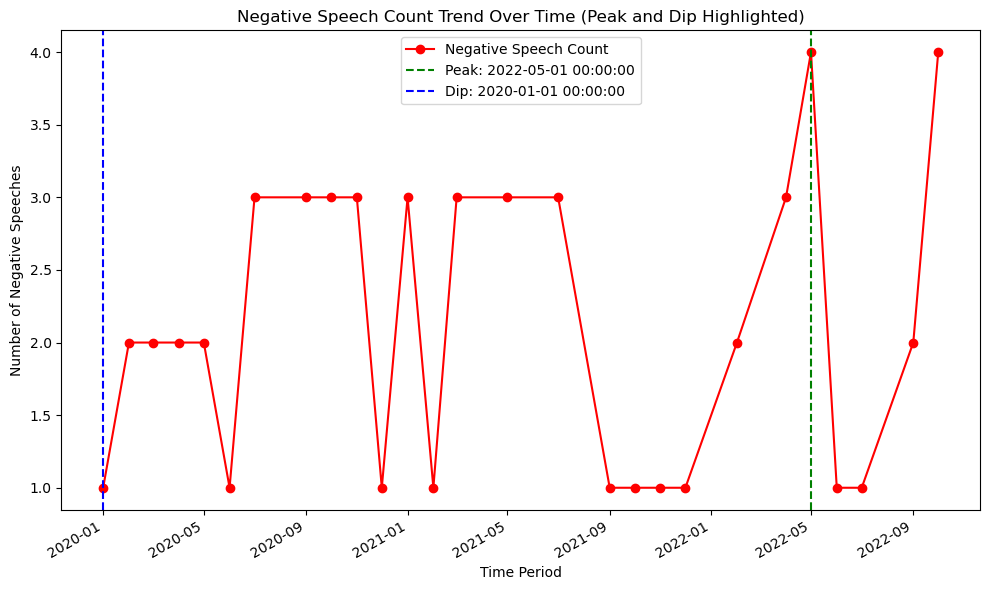

In [21]:
# Plot negative speech counts over time
plt.figure(figsize=(10, 6))
negative_counts.plot(kind='line', marker='o', color='red', label='Negative Speech Count')

# Highlight the peak and dip
plt.axvline(x=peak_timestamp, color='green', linestyle='--', label=f'Peak: {peak_timestamp}')
plt.axvline(x=dip_timestamp, color='blue', linestyle='--', label=f'Dip: {dip_timestamp}')

# Add titles and labels
plt.title('Negative Speech Count Trend Over Time (Peak and Dip Highlighted)')
plt.xlabel('Time Period')
plt.ylabel('Number of Negative Speeches')
plt.legend()
plt.tight_layout()
plt.show()

# 11. Analyze the Top 3 Most Frequent Words by Author

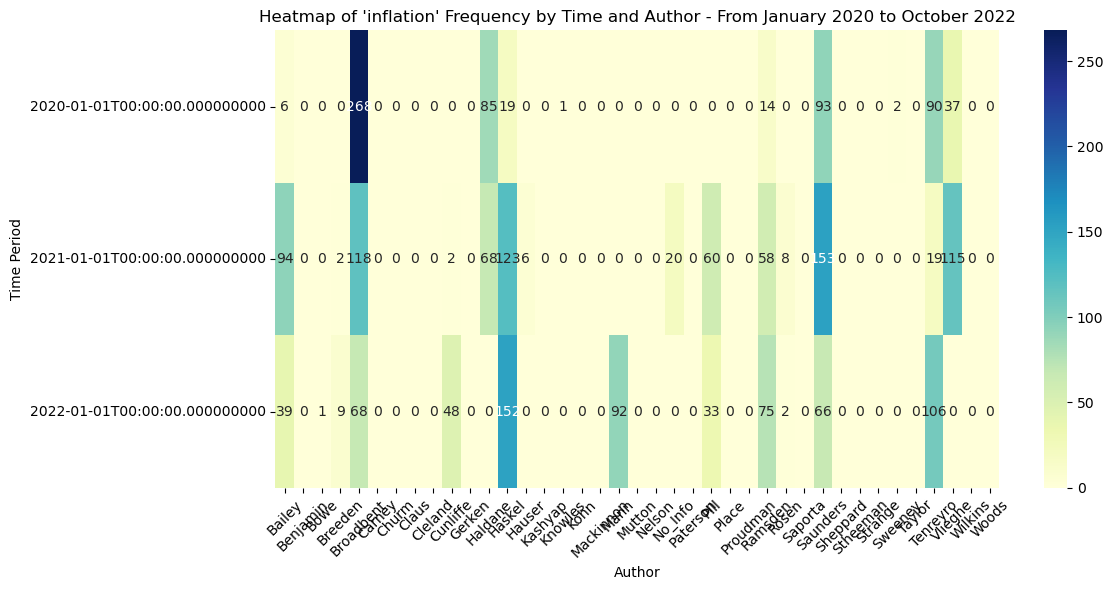

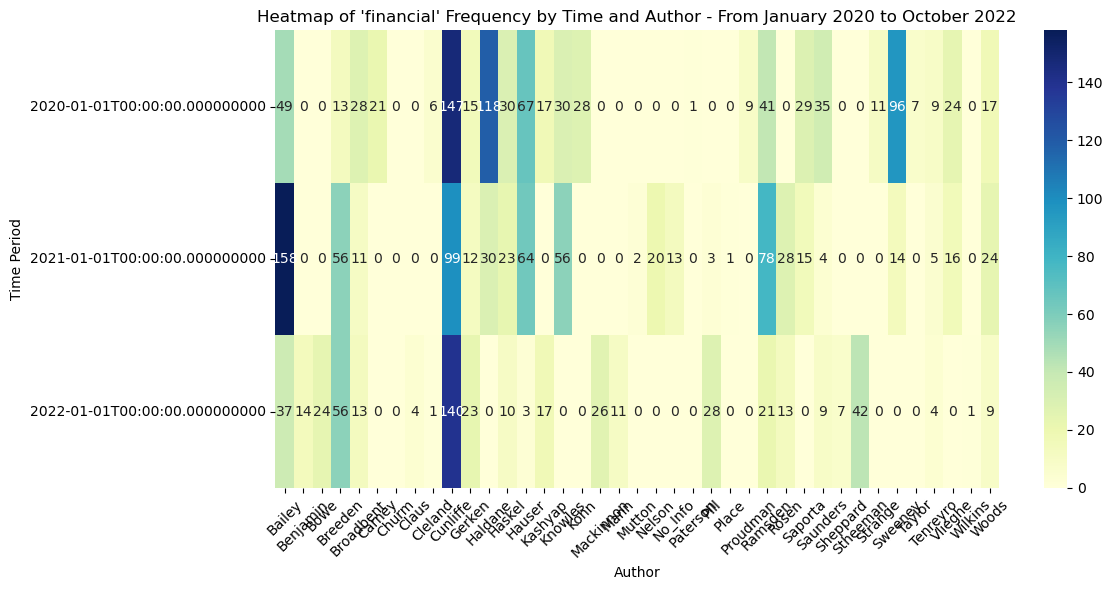

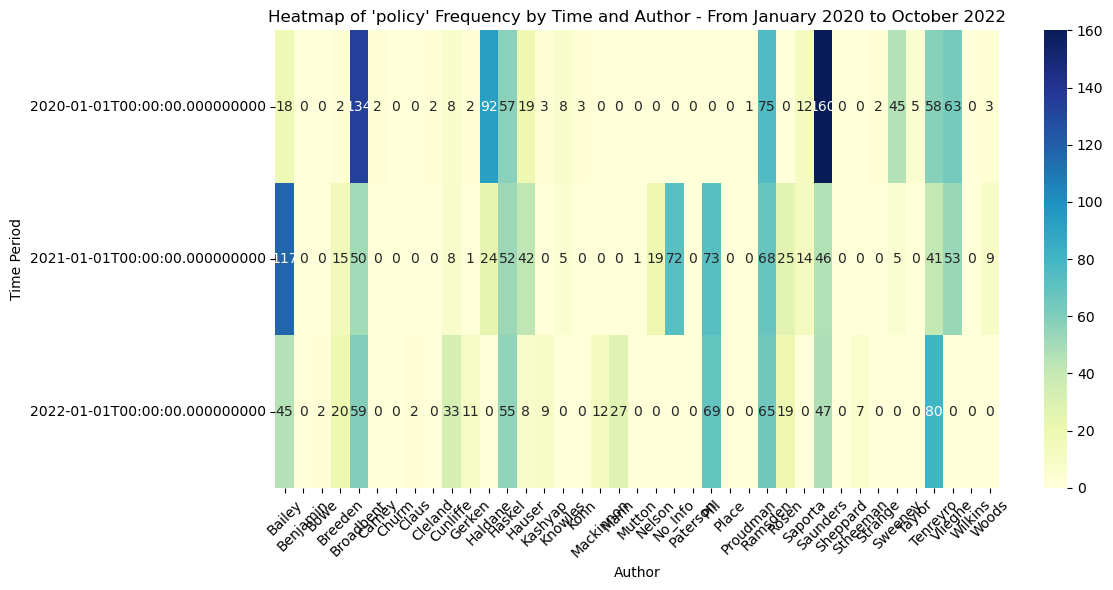

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
N = 3  # number of words to track (top N overall)
time_col = 'Date'  # date column
author_col = 'Author'  # author column
IsGov_col ="IsGov" #IsGove column

df[time_col] = pd.to_datetime(df[time_col])
df['time_period'] = df[time_col].dt.to_period('Y').dt.to_timestamp()  # yearly grouping

# Group texts by time period and author
grouped = df.groupby([author_col, 'time_period'])['Text'].apply(lambda texts: ' '.join(texts)).reset_index()

# Vectorize grouped texts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(grouped['Text'])

# Vocabulary and total counts to find top N words overall
total_counts = X.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()
top_n_indices = total_counts.argsort()[::-1][:N]
top_n_words = [vocab[i] for i in top_n_indices]

# Build a DataFrame for word counts per (Author, time)
counts_df = pd.DataFrame(X.toarray(), columns=vocab)
counts_df[author_col] = grouped[author_col]
counts_df['time_period'] = grouped['time_period']


# For each top word, pivot the data and plot heatmap
for word in top_n_words:
    pivot_table = counts_df.pivot(index='time_period', columns=author_col, values=word).fillna(0)

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
    plt.title(f"Heatmap of '{word}' Frequency by Time and Author - From {start_date_formatted} to {end_date_formatted}")
    plt.xlabel("Author")
    plt.ylabel("Time Period")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 12.Sentiment-Weighted Word Frequency Analysis

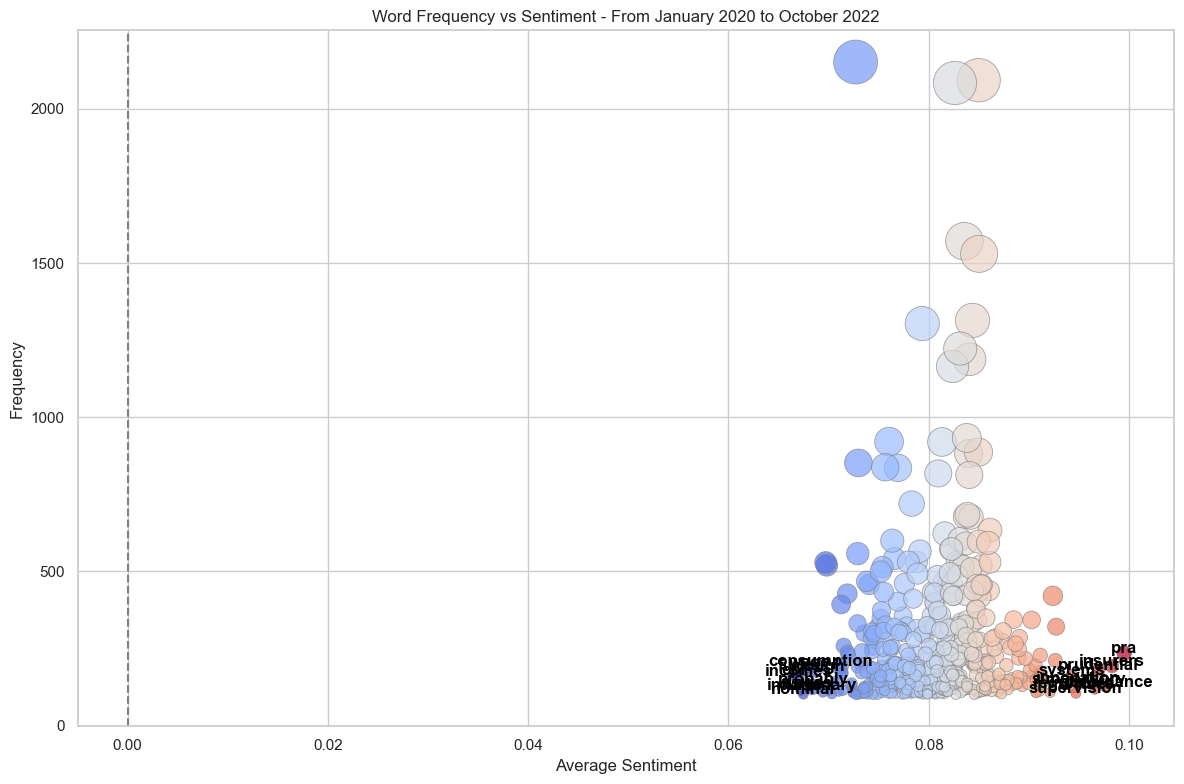

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

# Ensure 'polarity_textblob' is numeric and drop rows with missing data
df['polarity_textblob'] = pd.to_numeric(df['polarity_textblob'], errors='coerce')
df = df.dropna(subset=['polarity_textblob', 'Text'])

# Vectorize all texts
vectorizer = CountVectorizer(stop_words='english', max_features=500)  # limit to top 500 words
X = vectorizer.fit_transform(df['Text'])
vocab = vectorizer.get_feature_names_out()

# Create a DataFrame of word counts
word_counts = pd.DataFrame(X.toarray(), columns=vocab)
word_counts['polarity'] = df['polarity_textblob'].values

# Compute frequency and average sentiment for each word
word_stats = pd.DataFrame({
    'word': vocab,
    'frequency': word_counts[vocab].sum().values,
    'avg_sentiment': [word_counts.loc[word_counts[word] > 0, 'polarity'].mean() for word in vocab]
})

# Sort by most extreme sentiment for labeling
top_words = pd.concat([
    word_stats.sort_values('avg_sentiment', ascending=False).head(10),
    word_stats.sort_values('avg_sentiment').head(10)
])

# Plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=word_stats,
    x="avg_sentiment",
    y="frequency",
    size="frequency",
    hue="avg_sentiment",
    sizes=(50, 1000),
    palette="coolwarm",
    alpha=0.7,
    edgecolor="gray",
    legend=False
)

# Label most extreme words
for _, row in top_words.iterrows():
    plt.text(row['avg_sentiment'], row['frequency'], row['word'],
             horizontalalignment='center', size='medium', color='black', weight='semibold')

#plt.title("Word Frequency vs Sentiment ")
plt.title(f"Word Frequency vs Sentiment - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Average Sentiment")
plt.ylabel("Frequency")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


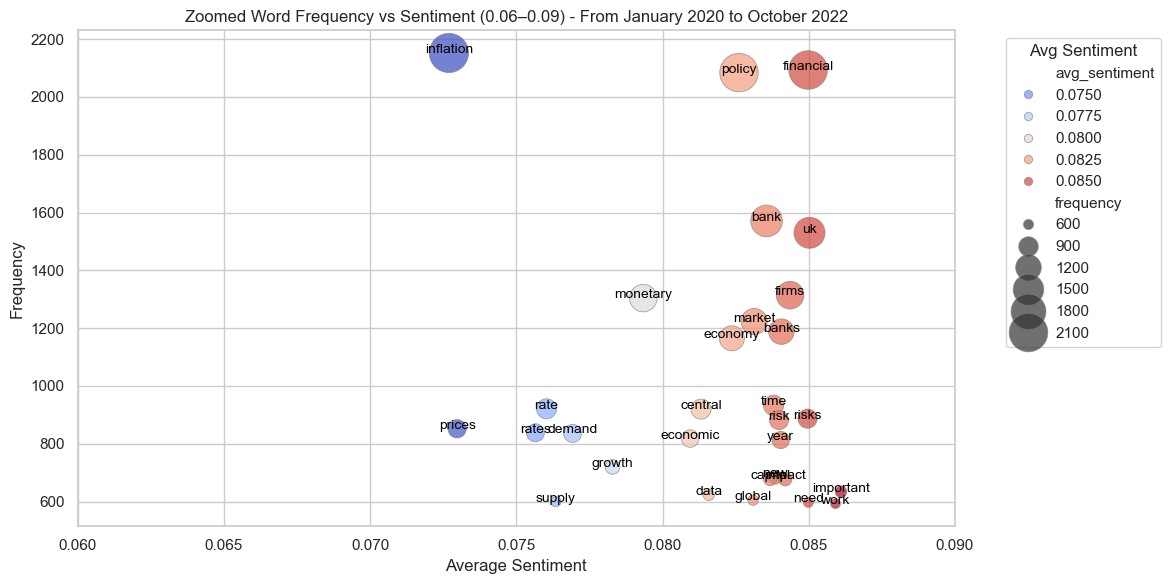

In [24]:
# Filter to zoom in on sentiment range between 0.06 and 0.09
zoomed_stats = word_stats[(word_stats['avg_sentiment'] >= 0.07) & (word_stats['avg_sentiment'] <= 0.09)]

# Optional: show only top N most frequent words in that range
zoomed_stats = zoomed_stats.sort_values('frequency', ascending=False).head(30)

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

scatter = sns.scatterplot(
    data=zoomed_stats,
    x="avg_sentiment",
    y="frequency",
    size="frequency",
    hue="avg_sentiment",          # Color by sentiment
    sizes=(50, 800),
    palette="coolwarm",
    alpha=0.7,
    edgecolor="gray",
    legend=True                   # Enable legend
)

# Label top words
for _, row in zoomed_stats.iterrows():
    plt.text(row['avg_sentiment'], row['frequency'], row['word'],
             horizontalalignment='center', size='small', color='black')

# Title and axis labels
#plt.title("Zoomed Word Frequency vs Sentiment (0.07–0.09)")
plt.title(f"Zoomed Word Frequency vs Sentiment (0.06–0.09) - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Average Sentiment")
plt.ylabel("Frequency")
plt.xlim(0.06, 0.09)
plt.tight_layout()

# Show legend with clearer title
plt.legend(title='Avg Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
